In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
data = pd.read_csv('loan_lead_data.csv')

In [4]:
X = data.drop('Loan Approved', axis=1)
y = data['Loan Approved']
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [5]:
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Class Distribution before SMOTE'}>

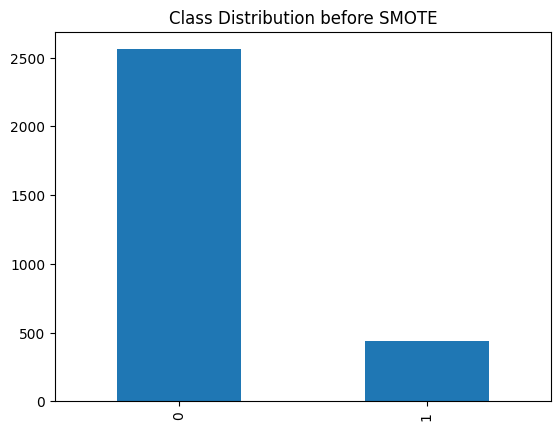

In [6]:
y_train.value_counts().plot(kind='bar', title='Class Distribution before SMOTE')

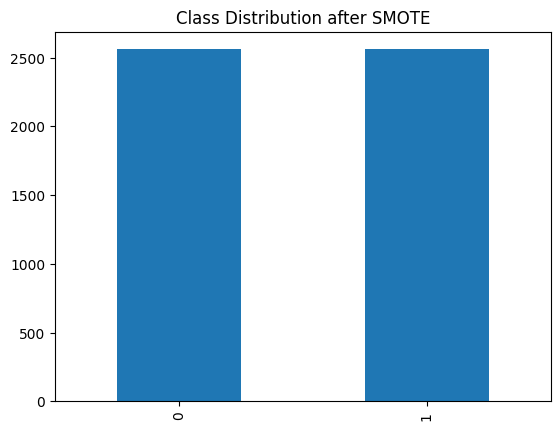

In [8]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
y_train_smote.value_counts().plot(kind='bar', title='Class Distribution after SMOTE')

plt.show()

In [9]:
import time

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
start_time = time.time()
logreg.fit(X_train_smote, y_train_smote)
logreg_train_time = time.time() - start_time

logreg_train_time

1.7787871360778809

In [10]:
from sklearn.metrics import accuracy_score
start_time = time.time()
y_pred_logreg = logreg.predict(X_test)
logreg_predict_time = time.time() - start_time

logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
logreg_accuracy, logreg_predict_time

(0.8325, 0.003384828567504883)

In [11]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=42)
start_time = time.time()
dtree.fit(X_train_smote, y_train_smote)
dtree_train_time = time.time() - start_time
dtree_train_time

0.04671525955200195

In [12]:
start_time = time.time()
y_pred_dtree = dtree.predict(X_test)
dtree_predict_time = time.time() - start_time
dtree_accuracy = accuracy_score(y_test, y_pred_dtree)
dtree_accuracy, dtree_predict_time

(0.953, 0.003238677978515625)

In [13]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(n_estimators=50, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='logloss')
start_time = time.time()
xgb_model.fit(X_train_smote, y_train_smote)
xgb_train_time = time.time() - start_time
xgb_train_time

0.8535799980163574

In [14]:
start_time = time.time()
y_pred_xgb = xgb_model.predict(X_test)
xgb_predict_time = time.time() - start_time
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_accuracy, xgb_predict_time

(0.972, 0.013007640838623047)

In [15]:
from sklearn.svm import SVC
svm_model = SVC(random_state=42)
start_time = time.time()
svm_model.fit(X_train_smote, y_train_smote)
svm_train_time = time.time() - start_time
svm_train_time

0.8583385944366455

In [16]:
start_time = time.time()
y_pred_svm = svm_model.predict(X_test)

svm_predict_time = time.time() - start_time
svm_accuracy = accuracy_score(y_test, y_pred_svm)

svm_accuracy, svm_predict_time

(0.8505, 0.3113975524902344)

In [17]:
import sys
import pickle
import os
logreg_stream = pickle.dumps(logreg)
logreg_size = sys.getsizeof(logreg_stream)
dtree_stream = pickle.dumps(dtree)
dtree_size = sys.getsizeof(dtree_stream)

xgb_model_stream = pickle.dumps(xgb_model)
xgb_model_size = sys.getsizeof(xgb_model_stream)
svm_model_stream = pickle.dumps(svm_model)
svm_model_size = sys.getsizeof(svm_model_stream)
logreg_size, dtree_size, xgb_model_size, svm_model_size

(1425, 16081, 139092, 294317)

In [19]:
logreg_coef = abs(logreg.coef_[0])

top_2_logreg_features = X.columns[logreg_coef.argsort()[-2:][::-1]]

top_2_dtree_features = X.columns[dtree.feature_importances_.argsort()[-2:][::-1]]

top_2_xgb_features = X.columns[xgb_model.feature_importances_.argsort()[-2:][::-1]]
top_2_logreg_features, top_2_dtree_features, top_2_xgb_features

(Index(['Age', 'Loan Period'], dtype='object'),
 Index(['New Debt to Income ratio', 'Value of Collateral'], dtype='object'),
 Index(['New Debt to Income ratio', 'Value of Collateral'], dtype='object'))